In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_total = pd.read_csv('./cases-brazil-states.csv')
df_total = df_total[df_total['estado'] == 'SP']


In [4]:
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [5]:
df_total.shape

(158, 18)

In [6]:
df_total['data'] = pd.to_datetime(df_total['data'], format='%Y-%m-%d')
df_total.index = df_total['data']
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [7]:
df_total.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-07-27,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,487654,47.20481,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249
2020-07-28,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,487654,48.03889,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249
2020-07-29,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,514197,48.75754,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249
2020-07-30,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,529006,49.45660,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886
2020-07-31,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886


In [8]:
y = df_total['novosObitos']

In [9]:
y.head()

data
2020-02-25    0
2020-02-26    0
2020-02-27    0
2020-02-28    0
2020-02-29    0
Name: novosObitos, dtype: int64

In [10]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [11]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [12]:
import statsmodels.api as sm

In [14]:
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, 
                                        order = param,
                                        seasonal_order = param_seasonal)
        results = mod.fit()
        aic_list.append(f'ARIMA {param}x{param_seasonal} - AIC {results.aic}')

C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundatio

In [15]:
aic_list

['ARIMA (0, 0, 0)x(0, 0, 0, 7) - AIC 2119.686910354927',
 'ARIMA (0, 0, 0)x(0, 0, 1, 7) - AIC 1979.935931407131',
 'ARIMA (0, 0, 0)x(0, 1, 0, 7) - AIC 1622.8583478002934',
 'ARIMA (0, 0, 0)x(0, 1, 1, 7) - AIC 1604.2816317425777',
 'ARIMA (0, 0, 0)x(1, 0, 0, 7) - AIC 1716.139184924268',
 'ARIMA (0, 0, 0)x(1, 0, 1, 7) - AIC 1699.2530781653925',
 'ARIMA (0, 0, 0)x(1, 1, 0, 7) - AIC 1599.33119473954',
 'ARIMA (0, 0, 0)x(1, 1, 1, 7) - AIC 1601.160442049209',
 'ARIMA (0, 0, 1)x(0, 0, 0, 7) - AIC 2009.2582487235588',
 'ARIMA (0, 0, 1)x(0, 0, 1, 7) - AIC 1910.9152136481293',
 'ARIMA (0, 0, 1)x(0, 1, 0, 7) - AIC 1622.7005976188361',
 'ARIMA (0, 0, 1)x(0, 1, 1, 7) - AIC 1599.3674684761008',
 'ARIMA (0, 0, 1)x(1, 0, 0, 7) - AIC 1714.1767529666274',
 'ARIMA (0, 0, 1)x(1, 0, 1, 7) - AIC 1692.2223875640993',
 'ARIMA (0, 0, 1)x(1, 1, 0, 7) - AIC 1595.6577201680786',
 'ARIMA (0, 0, 1)x(1, 1, 1, 7) - AIC 1596.5072605200144',
 'ARIMA (0, 1, 0)x(0, 0, 0, 7) - AIC 1906.4381843222982',
 'ARIMA (0, 1, 0)x(0

C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\rivaldo junior\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


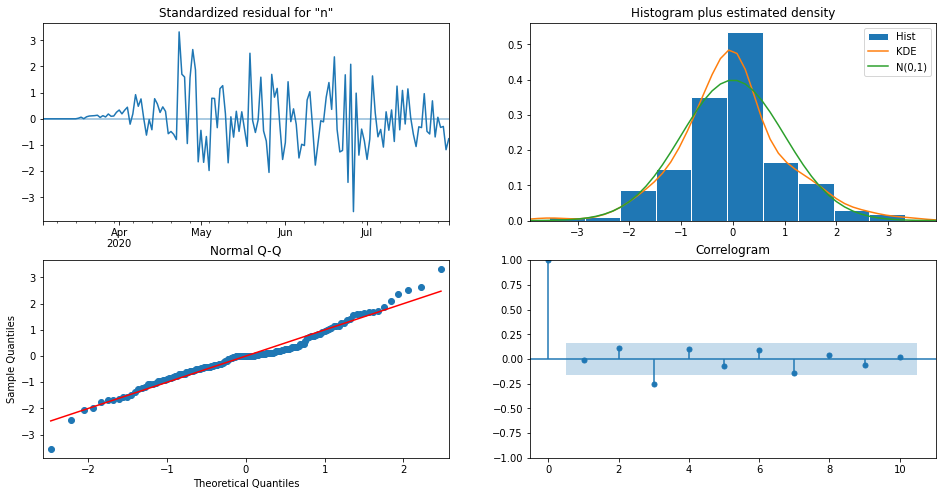

In [17]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (0,1,1,7))
results = mod.fit()
results.plot_diagnostics(figsize=(16,8))
plt.show()

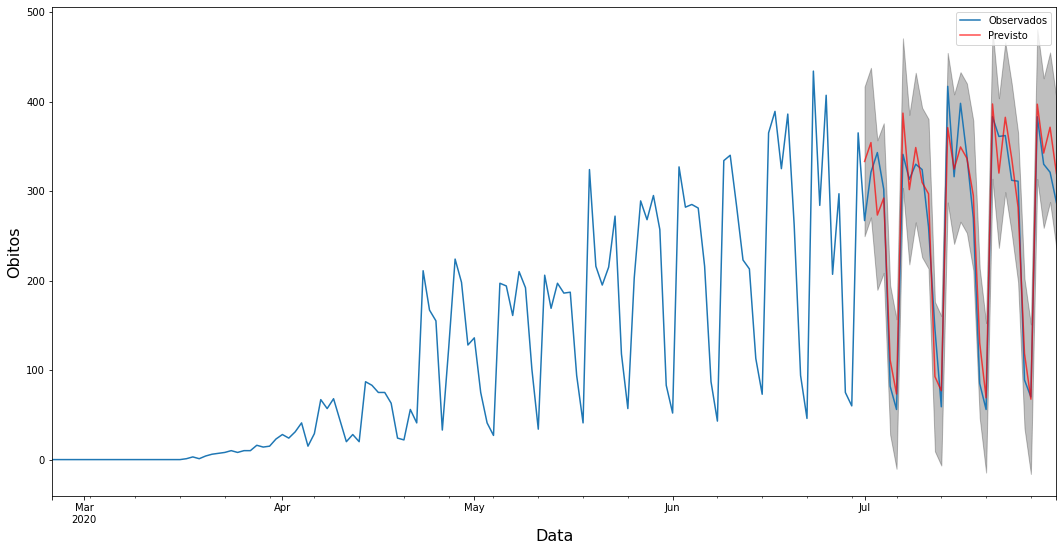

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha =0.7, figsize=(18,9))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.25)
plt.legend()
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Obitos', fontsize=16)
plt.show()

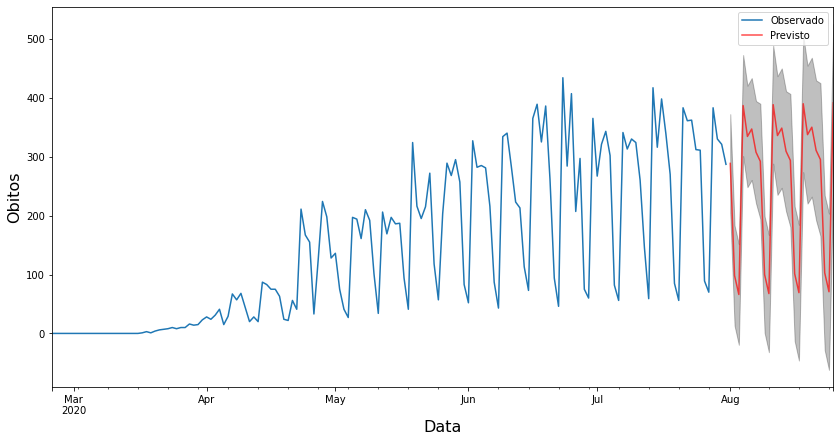

In [23]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7 )
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.25)
plt.legend()
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Obitos', fontsize=16)
plt.show()



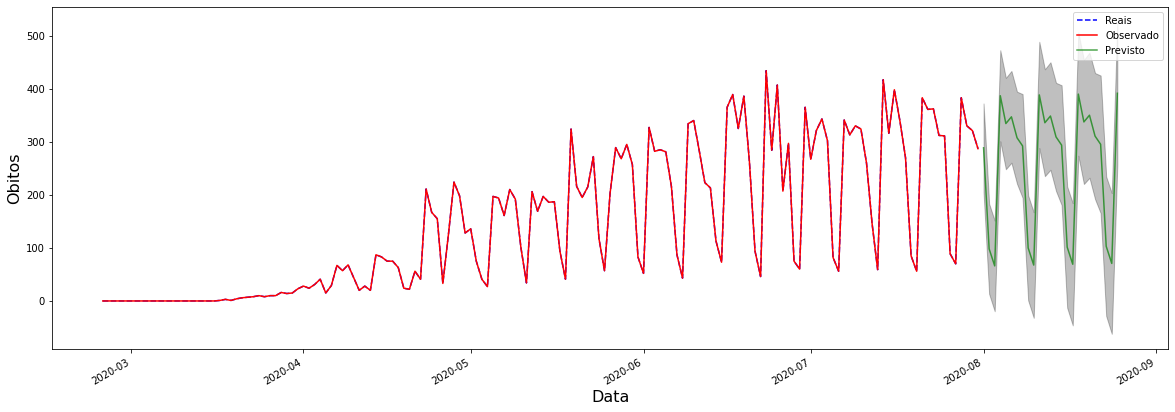

In [25]:
x = df_total['novosObitos']
plt.figure(figsize=(20,7))
fig = plt.plot(x, linestyle='--', color='b', label='Reais')
ax = y.plot(label = 'Observado', color='red')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='green', alpha=0.7 )
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.25)

plt.legend()
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Obitos', fontsize=16)
plt.show()
